In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

In [2]:
def fetch_url_data(pageNo):
  
# url = 'https://www.amazon.com/Crocs-Unisex-Adult-Classic-Water-Comfortable/product-reviews/B08L7T3L8C/ref=cm_cr_arp_d_paging_btm_next_'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo)
    url = 'https://www.amazon.com/Crocs-Unisex-Adult-Classic-Water-Comfortable/product-reviews/B08L7T3L8C/ref=cm_cr_getr_d_paging_btm_next_'+str(pageNo)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(pageNo)+'&filterByStar=positive'
    headers={"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.2 Safari/605.1.15","Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page=requests.get(url, headers=headers)
    
    soup = BeautifulSoup(page.content)
    


      # r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
      # content = r.content
      # soup = BeautifulSoup(content)



    table = []
    for a in soup.find_all('div', attrs={'class':'a-section review aok-relative'}):
        author_name = a.find('span',attrs={'class':'a-profile-name'})
        title = a.find('a', attrs={'class':'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'})
        rating = a.find('span', attrs={'class':'a-icon-alt'})
        review = a.find('span', attrs={'class':'a-size-base review-text review-text-content'})
        size = a.find('a', attrs={'class':'a-size-mini a-link-normal a-color-secondary'})
        helpfullness = a.find('div', attrs={'class':'a-row a-spacing-small'})
        review_date = a.find('span', attrs={'class','a-size-base a-color-secondary review-date'})
        
        columns=[]
        
        if title is not None:
            columns.append(title.text)
        else:
            columns.append(np.nan)
            
        if author_name is not None:
            columns.append(author_name.text)
        else:
            columns.append(np.nan)

        if rating is not None:
            columns.append(rating.text)
        else:
            columns.append(np.nan)
            
        if review is not None:
            columns.append(review.text)
        else:
            columns.append(np.nan)
            
        if size is not None:
            columns.append(size.text)
        else:
            columns.append(np.nan)
            
        if helpfullness is not None:   
            columns.append(helpfullness.text)
        else:
            columns.append(np.nan)
            
        if review_date is not None:
            columns.append(review_date.text)
        else:
            columns.append(np.nan)
            
        table.append(columns)
              
    return table

In [3]:
complete_data = []
for i in range(0, 3000):
    complete_data.append(fetch_url_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]

In [4]:
df = pd.DataFrame(flatten(complete_data),columns=['Title','Author Name','Rating','Review', 'Size', 'Helpfullness', 'Review_Date'])
df.head(80)

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,\nHow Crocs Changed My Life\n,Heidi Bumanlag,5.0 out of 5 stars,"\n\n I will admit, I once was a hater. I live...",Size: 7 Women/5 MenColor: Lemon,"1,903 people found this helpful","Reviewed in the United States on September 30,..."
1,\nCall me a Croc Enthusiast!!\n,A. Roumie,5.0 out of 5 stars,\n\n I LOVE THESE THINGS!! They're stylish an...,Size: 10 Women/8 MenColor: Navy,513 people found this helpful,"Reviewed in the United States on August 15, 2017"
2,\nFreesail vs Classic\n,Jeanne,5.0 out of 5 stars,\n\n I own 2 pair of Crocs women's Freesail a...,Size: 9 Women/7 MenColor: White,323 people found this helpful,"Reviewed in the United States on July 22, 2017"
3,\nCutest Comfy Ugly Shoe You Can Buy\n,FLRL,5.0 out of 5 stars,\n\n I bought this classic fit (wide) shoe in...,Size: 8 Women/6 MenColor: Black,211 people found this helpful,"Reviewed in the United States on October 17, 2017"
4,\nand we like how easy it is to get them on\n,Tyler,5.0 out of 5 stars,"\n\n I never, ever thought I'd wear Crocs, bu...",Size: 14 Women/12 MenColor: Khaki,178 people found this helpful,"Reviewed in the United States on October 11, 2017"
...,...,...,...,...,...,...,...
75,\nMust Buy!\n,Tee H,5.0 out of 5 stars,\n\n I was pretty skeptical about purchasing ...,Size: 8 Women/6 MenColor: White,2 people found this helpful,"Reviewed in the United States on May 5, 2019"
76,"\nExcellent for pool deck, locker room, and at...",Nina Jordan,5.0 out of 5 stars,\n\n Excellent sandal for walking on the pool...,Size: 9 Women/7 MenColor: Black,2 people found this helpful,"Reviewed in the United States on May 24, 2020"
77,\nI LOVE MY CROCS.\n,Rachel,5.0 out of 5 stars,\n\n I was so excited to get the cyan blue cr...,Size: 6 Women/4 MenColor: Ice Blue,4 people found this helpful,"Reviewed in the United States on December 30, ..."
78,\nPerfect in every way\n,AndieJoy,5.0 out of 5 stars,\n\n I needed some slip-on shoes to wear whil...,Size: 11 Women/9 MenColor: Black,One person found this helpful,"Reviewed in the United States on February 19, ..."


In [5]:
df.describe()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
count,5010,5010,5010,5010,4826,451,5010
unique,3797,4270,2,4862,283,26,1424
top,\nComfortable\n,Amazon Customer,5.0 out of 5 stars,\n\n Great\n\n,Size: 13 Women/11 MenColor: Black,One person found this helpful,"Reviewed in the United States on July 24, 2020"
freq,79,305,4444,14,148,310,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         5010 non-null   object
 1   Author Name   5010 non-null   object
 2   Rating        5010 non-null   object
 3   Review        5010 non-null   object
 4   Size          4826 non-null   object
 5   Helpfullness  451 non-null    object
 6   Review_Date   5010 non-null   object
dtypes: object(7)
memory usage: 274.1+ KB


In [7]:
df.to_csv('crocs_review_positive.csv', index=False, encoding='utf-8')

In [2]:
df = pd.read_csv("crocs_review_positive.csv")
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,\nHow Crocs Changed My Life\n,Heidi Bumanlag,5.0 out of 5 stars,"\n\n I will admit, I once was a hater. I live...",Size: 7 Women/5 MenColor: Lemon,"1,903 people found this helpful","Reviewed in the United States on September 30,..."
1,\nCall me a Croc Enthusiast!!\n,A. Roumie,5.0 out of 5 stars,\n\n I LOVE THESE THINGS!! They're stylish an...,Size: 10 Women/8 MenColor: Navy,513 people found this helpful,"Reviewed in the United States on August 15, 2017"
2,\nFreesail vs Classic\n,Jeanne,5.0 out of 5 stars,\n\n I own 2 pair of Crocs women's Freesail a...,Size: 9 Women/7 MenColor: White,323 people found this helpful,"Reviewed in the United States on July 22, 2017"
3,\nCutest Comfy Ugly Shoe You Can Buy\n,FLRL,5.0 out of 5 stars,\n\n I bought this classic fit (wide) shoe in...,Size: 8 Women/6 MenColor: Black,211 people found this helpful,"Reviewed in the United States on October 17, 2017"
4,\nand we like how easy it is to get them on\n,Tyler,5.0 out of 5 stars,"\n\n I never, ever thought I'd wear Crocs, bu...",Size: 14 Women/12 MenColor: Khaki,178 people found this helpful,"Reviewed in the United States on October 11, 2017"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         5010 non-null   object
 1   Author Name   5010 non-null   object
 2   Rating        5010 non-null   object
 3   Review        5010 non-null   object
 4   Size          4826 non-null   object
 5   Helpfullness  451 non-null    object
 6   Review_Date   5010 non-null   object
dtypes: object(7)
memory usage: 274.1+ KB


In [5]:
df.describe()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
count,5010,5010,5010,5010,4826,451,5010
unique,3797,4270,2,4862,283,26,1424
top,\nComfortable\n,Amazon Customer,5.0 out of 5 stars,\n\n Great\n\n,Size: 13 Women/11 MenColor: Black,One person found this helpful,"Reviewed in the United States on July 24, 2020"
freq,79,305,4444,14,148,310,23


In [6]:
df.isnull().any().count

<bound method Series.count of Title           False
Author Name     False
Rating          False
Review          False
Size             True
Helpfullness     True
Review_Date     False
dtype: bool>

In [4]:
df['Title'] = df['Title'].replace('\n', '',regex=True)
df['Review'] = df['Review'].replace('\n', '',regex=True)
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date
0,How Crocs Changed My Life,Heidi Bumanlag,5.0 out of 5 stars,"I will admit, I once was a hater. I lived a ...",Size: 7 Women/5 MenColor: Lemon,"1,903 people found this helpful","Reviewed in the United States on September 30,..."
1,Call me a Croc Enthusiast!!,A. Roumie,5.0 out of 5 stars,I LOVE THESE THINGS!! They're stylish and fu...,Size: 10 Women/8 MenColor: Navy,513 people found this helpful,"Reviewed in the United States on August 15, 2017"
2,Freesail vs Classic,Jeanne,5.0 out of 5 stars,I own 2 pair of Crocs women's Freesail and f...,Size: 9 Women/7 MenColor: White,323 people found this helpful,"Reviewed in the United States on July 22, 2017"
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0 out of 5 stars,I bought this classic fit (wide) shoe in siz...,Size: 8 Women/6 MenColor: Black,211 people found this helpful,"Reviewed in the United States on October 17, 2017"
4,and we like how easy it is to get them on,Tyler,5.0 out of 5 stars,"I never, ever thought I'd wear Crocs, but he...",Size: 14 Women/12 MenColor: Khaki,178 people found this helpful,"Reviewed in the United States on October 11, 2017"


In [5]:
df[['Size','Colour']] = df['Size'].str.split("Color:",expand=True)
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date,Colour
0,How Crocs Changed My Life,Heidi Bumanlag,5.0 out of 5 stars,"I will admit, I once was a hater. I lived a ...",Size: 7 Women/5 Men,"1,903 people found this helpful","Reviewed in the United States on September 30,...",Lemon
1,Call me a Croc Enthusiast!!,A. Roumie,5.0 out of 5 stars,I LOVE THESE THINGS!! They're stylish and fu...,Size: 10 Women/8 Men,513 people found this helpful,"Reviewed in the United States on August 15, 2017",Navy
2,Freesail vs Classic,Jeanne,5.0 out of 5 stars,I own 2 pair of Crocs women's Freesail and f...,Size: 9 Women/7 Men,323 people found this helpful,"Reviewed in the United States on July 22, 2017",White
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0 out of 5 stars,I bought this classic fit (wide) shoe in siz...,Size: 8 Women/6 Men,211 people found this helpful,"Reviewed in the United States on October 17, 2017",Black
4,and we like how easy it is to get them on,Tyler,5.0 out of 5 stars,"I never, ever thought I'd wear Crocs, but he...",Size: 14 Women/12 Men,178 people found this helpful,"Reviewed in the United States on October 11, 2017",Khaki


In [6]:
df[['Men Size','Women Size']] = df['Size'].str.split("/",expand=True)
del df['Size']
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0 out of 5 stars,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful","Reviewed in the United States on September 30,...",Lemon,Size: 7 Women,5 Men
1,Call me a Croc Enthusiast!!,A. Roumie,5.0 out of 5 stars,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,"Reviewed in the United States on August 15, 2017",Navy,Size: 10 Women,8 Men
2,Freesail vs Classic,Jeanne,5.0 out of 5 stars,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,"Reviewed in the United States on July 22, 2017",White,Size: 9 Women,7 Men
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0 out of 5 stars,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,"Reviewed in the United States on October 17, 2017",Black,Size: 8 Women,6 Men
4,and we like how easy it is to get them on,Tyler,5.0 out of 5 stars,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,"Reviewed in the United States on October 11, 2017",Khaki,Size: 14 Women,12 Men


In [7]:
df['Men Size'] = df['Men Size'].str.extract('(\d+.\d+|\d+)')
df['Women Size'] = df['Women Size'].str.extract('(\d+.\d+|\d+)')
df['Rating'] = df['Rating'].str.extract('(\d+.\d+|\d+)')
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful","Reviewed in the United States on September 30,...",Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,"Reviewed in the United States on August 15, 2017",Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,"Reviewed in the United States on July 22, 2017",White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,"Reviewed in the United States on October 17, 2017",Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,"Reviewed in the United States on October 11, 2017",Khaki,14,12


In [8]:
#df['Review_Date'].str.extract('') 
df['Review_Date'] = df['Review_Date'].str[33:]

In [9]:
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful","September 30, 2019",Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,"August 15, 2017",Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,"July 22, 2017",White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,"October 17, 2017",Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,"October 11, 2017",Khaki,14,12


In [10]:
from datetime import datetime

In [15]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df.head()
#df['Review_Date'] = datetime.strptime('September 12 2018', '%b %d %Y')
# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful",2019-09-30,Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,2017-08-15,Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,2017-07-22,White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,2017-10-17,Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,2017-10-11,Khaki,14,12


In [31]:
df.head()

,Title,Author Name,Rating,Review,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,How Crocs Changed My Life,Heidi Bumanlag,5.0,"I will admit, I once was a hater. I lived a ...","1,903 people found this helpful",2005-06-01,Lemon,7,5
1,Call me a Croc Enthusiast!!,A. Roumie,5.0,I LOVE THESE THINGS!! They're stylish and fu...,513 people found this helpful,2005-06-01,Navy,10,8
2,Freesail vs Classic,Jeanne,5.0,I own 2 pair of Crocs women's Freesail and f...,323 people found this helpful,2005-06-01,White,9,7
3,Cutest Comfy Ugly Shoe You Can Buy,FLRL,5.0,I bought this classic fit (wide) shoe in siz...,211 people found this helpful,2005-06-01,Black,8,6
4,and we like how easy it is to get them on,Tyler,5.0,"I never, ever thought I'd wear Crocs, but he...",178 people found this helpful,2005-06-01,Khaki,14,12


In [ ]:
df['Helpfullness'] = df['Helpfullness'].str.split().str.get(0)
df.head()

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date,Colour,Men Size,Women Size
0,Long Lover of Crocs. Don't worry about sizes f...,World of Wayne,5.0,Just bought these for the Mrs. She is a size...,Size: 5/6 UK Wide,17,Reviewed in the United Kingdom on 14 April 2020,Neon Purple,5,6
1,Confusing sizes!! Womans are affected also!! B...,caroline,5.0,"These crocs are really soft , flexible and s...",Size: 3 UK Men/ 4 UK Women,37,Reviewed in the United Kingdom on 6 April 2016,Black,3,4
2,Pot Luck,Cake Lady,5.0,I'm a size 6 and have worn crocs for years a...,Size: 5/5.5 UK,9,Reviewed in the United Kingdom on 18 October 2019,Candy Pink,5,5.5
3,What is wrong with these sizes?!?,Uncle Lol,5.0,"Pros: They're comfy, they're washable, they ...",Size: 6 UK Men/ 7 UK Women,6,Reviewed in the United Kingdom on 12 July 2019,Navy,6,7
4,Great shoes for beach and garden!,emlep,4.0,I use a pair of crocs for beach walks (no fe...,Size: 3 UK Men/ 4 UK Women,2,Reviewed in the United Kingdom on 18 April 2020,Navy,3,4
5,Pomegranate Crocs! What's not to like!,C. Hawkes,5.0,"OK, first off I am a Croc fan. I've even bee...",Size: 9 UK,4,Reviewed in the United Kingdom on 23 November ...,Pomegranate,9,NaN
6,Not as good as the old style,Cocohoney,3.0,They have changed the shape and feel of Clas...,Size: 9 UK Men/ 10 UK Women,16,Reviewed in the United Kingdom on 26 March 2016,Black,9,10
7,Very comfortable,katiecroc,4.0,I think i may be in love with these shoes. I...,Size: 5 UK Men/ 6 UK Women,6,Reviewed in the United Kingdom on 5 October 2017,Black,5,6
8,Legit. Comfy & perfect fit,Mrs Lee,5.0,I was really dubious about these as I was un...,Size: 4.5/5 UK,One,Reviewed in the United Kingdom on 14 May 2020,Bronze,4.5,5
9,Delightful Shoes - everyone loves them.,JHM,5.0,"Delightful shoes. Comfortable, light, flexib...",Size: 9 UK Men/ 10 UK Women,3,Reviewed in the United Kingdom on 6 August 2018,Lemon,9,10


In [51]:
df.tail(50)

,Title,Author Name,Rating,Review,Size,Helpfullness,Review_Date,Colour,Men Size,Women Size,valid_dates
4950,NaN,Andreas Knoch,5.0,Die schuhe sind wie erwartet mann geht sehr ...,Size: 15 UK,NaN,Reviewed in Germany on 18 July 2019,Black,15,NaN,[]
4951,NaN,Helen MacDonald,5.0,Great for slipping on and going out doors in...,Size: 8/9 UK,NaN,Reviewed in Canada on 25 November 2019,Black,8,9,[]
4952,NaN,Marni,5.0,"Wie erwartet perfekt. Man hat Platz, sie sin...",Size: 4 UK Men/ 5 UK Women,NaN,Reviewed in Germany on 30 September 2018,Black,4,5,[]
4953,NaN,Meike Flöing,5.0,....auch nach Jahren noch schön...,NaN,NaN,Reviewed in Germany on 15 October 2020,NaN,NaN,NaN,[]
4954,NaN,C,5.0,"Muy buen producto, corresponde con lo pedido.",Size: 8/9 UK,NaN,Reviewed in Spain on 6 June 2020,Pool,8,9,[]
4955,NaN,Ignacio Perez Rubio,5.0,"Producto de buena calidad, son muy cómodas. ...",Size: 8/9 UK,NaN,Reviewed in Spain on 11 November 2019,Black,8,9,[]
4956,NaN,marga,5.0,Tallan bien. Son anchos. Muy muy cómodos y r...,Size: 5 UK Men/ 6 UK Women,NaN,Reviewed in Spain on 3 July 2020,Black,5,6,[]
4957,NaN,Guillem Mayol Pol,5.0,Comodísimas. Yo las uso de zapatillas de and...,Size: 8/9 UK,NaN,Reviewed in Spain on 10 December 2020,Black,8,9,[]
4958,NaN,Sindy Reckmann,5.0,Ich weiß gar nicht wieviele Solcher Crocs me...,NaN,NaN,Reviewed in Germany on 11 August 2016,NaN,NaN,NaN,[]
4959,NaN,Primerano Anna,5.0,Le ho regalate e sono stata molto apprezzate...,Size: 8 UK Men/ 9 UK Women,NaN,Reviewed in Italy on 11 July 2020,Lemon,8,9,[]


In [12]:
crocs_reviews_string = " ".join(df['Review'])


In [13]:
from nltk.corpus import stopwords

In [14]:
# ip_rev_string = iphone_reviews
# Removing unwanted symbols incase if exists
crocs_reviews_string = re.sub("[^A-Za-z" "]+"," ",crocs_reviews_string).lower()
# crocs_reviews_string = re.sub("[0-9" "]+"," ",crocs_reviews_string)


# words that contained in iphone 7 reviews
crocs_reviews_words = crocs_reviews_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

crocs_reviews_words = [w for w in crocs_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
crocs_reviews_string = " ".join(crocs_reviews_words)

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

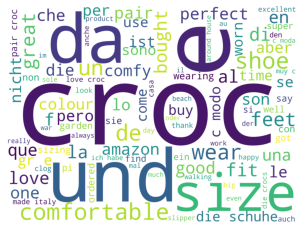

In [17]:
wordcloud_ip = WordCloud(
                      background_color='white',
                    width=2400,
                    height=1800,
                      max_words = 100
                     ).generate(crocs_reviews_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [50]:
df['Review_Date']

TypeError: 'Series' object is not callable

In [1]:
df.head()

NameError: name 'df' is not defined